In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
train_data = pd.read_csv('https://raw.githubusercontent.com/Valaska/Team_3_JHB/master/regression_dataset/Train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/Valaska/Team_3_JHB/master/regression_dataset/Test.csv')
riders = pd.read_csv('https://raw.githubusercontent.com/Valaska/Team_3_JHB/master/regression_dataset/Riders.csv')
dataset = pd.merge(train_data, riders, how='inner', on='Rider Id')
test_data = pd.merge(test_data, riders, how = 'inner', on= 'Rider Id')

In [5]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [ ]:
riders.head()

In [6]:
dataset.nunique()

Order No                                     21201
User Id                                       3186
Vehicle Type                                     1
Platform Type                                    4
Personal or Business                             2
Placement - Day of Month                        31
Placement - Weekday (Mo = 1)                     7
Placement - Time                             15686
Confirmation - Day of Month                     31
Confirmation - Weekday (Mo = 1)                  7
Confirmation - Time                          15742
Arrival at Pickup - Day of Month                31
Arrival at Pickup - Weekday (Mo = 1)             7
Arrival at Pickup - Time                     15767
Pickup - Day of Month                           31
Pickup - Weekday (Mo = 1)                        7
Pickup - Time                                15690
Arrival at Destination - Day of Month           31
Arrival at Destination - Weekday (Mo = 1)        7
Arrival at Destination - Time  

In [17]:
dataset.drop(['User Id', 'Vehicle Type', 'Order No', 'Rider Id'], axis =1, inplace = True)

In [18]:
dataset['Precipitation in millimeters'].fillna(value=0, inplace=True)
test_data['Precipitation in millimeters'].fillna(value=0, inplace=True)

In [10]:
dataset.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,0.0,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,18,5,...,0.0,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549
2,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,31,5,...,0.0,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549
3,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,2,2,...,0.0,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549
4,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,22,2,...,0.0,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Personal or Business'] = le.fit_transform(dataset['Personal or Business'])
test_data['Personal or Business'] = le.transform(test_data['Personal or Business'])

In [20]:
column_titles = [col for col in dataset.columns if col!= 'Time from Pickup to Arrival'] + ['Time from Pickup to Arrival']
dataset=dataset.reindex(columns=column_titles)
test_data =test_data.reindex(columns=column_titles)

In [14]:
dataset.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,3,0,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,0.0,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,745
1,3,1,18,5,3:41:17 PM,18,5,3:41:30 PM,18,5,...,0.0,-1.326774,36.787807,-1.356237,36.904295,1637,1309,13.8,549,2886
2,3,0,31,5,12:51:41 PM,31,5,1:12:49 PM,31,5,...,0.0,-1.255189,36.782203,-1.273412,36.818206,1637,1309,13.8,549,2615
3,3,1,2,2,7:12:10 AM,2,2,7:12:29 AM,2,2,...,0.0,-1.290315,36.757377,-1.223520,36.802061,1637,1309,13.8,549,2986
4,2,1,22,2,10:40:58 AM,22,2,10:42:24 AM,22,2,...,0.0,-1.273524,36.799220,-1.300431,36.752427,1637,1309,13.8,549,1602


In [18]:
test_data.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,3,0,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,...,0.0,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171,NaN
1,1,1,26,2,2:43:21 PM,26,2,2:47:16 PM,26,2,...,0.0,-1.312745,36.875715,-1.288435,36.760677,439,1511,13.3,171,NaN
2,3,0,29,5,11:55:05 AM,29,5,11:58:12 AM,29,5,...,0.0,-1.255189,36.782203,-1.293393,36.790237,439,1511,13.3,171,NaN
3,3,0,2,1,9:23:21 AM,2,1,9:23:44 AM,2,1,...,0.0,-1.310451,36.868724,-1.259542,36.787118,439,1511,13.3,171,NaN
4,3,0,14,4,12:55:59 PM,14,4,1:22:44 PM,14,4,...,0.0,-1.333275,36.870815,-1.255189,36.782203,439,1511,13.3,171,NaN


In [21]:
Time_data = list(dataset['Pickup - Time'])
new_dates = []

for i in range(len(Time_data)):
    a = Time_data[i][-2:]
    new_dates.append(a)


dataset['Pickup - Time'] = new_dates

In [22]:
Time_data2 = list(test_data['Pickup - Time'])
new_dates2 = []

for i in range(len(Time_data2)):
    a = Time_data2[i][-2:]
    new_dates2.append(a)

test_data['Pickup - Time'] = new_dates2

In [27]:
.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,3,0,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,0.0,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,745
1,3,1,18,5,3:41:17 PM,18,5,3:41:30 PM,18,5,...,0.0,-1.326774,36.787807,-1.356237,36.904295,1637,1309,13.8,549,2886
2,3,0,31,5,12:51:41 PM,31,5,1:12:49 PM,31,5,...,0.0,-1.255189,36.782203,-1.273412,36.818206,1637,1309,13.8,549,2615
3,3,1,2,2,7:12:10 AM,2,2,7:12:29 AM,2,2,...,0.0,-1.290315,36.757377,-1.223520,36.802061,1637,1309,13.8,549,2986
4,2,1,22,2,10:40:58 AM,22,2,10:42:24 AM,22,2,...,0.0,-1.273524,36.799220,-1.300431,36.752427,1637,1309,13.8,549,1602


In [23]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [39]:
#Average of Temperature
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 18:19])
X[:, 18:19] = imputer.transform(X[:, 18:19])

In [47]:
dataset['Temperature'] = X[:, 18:19]

In [49]:
corrs = dataset.corr()['Time from Pickup to Arrival'].sort_values(ascending=False)

In [51]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time from Pickup to Arrival']
for col in column_titles:
    p_val = round(pearsonr(dataset[col], dataset['Time from Pickup to Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Distance (KM),0.580608,0.000000
Average_Rating,-0.042559,0.000000
No_Of_Orders,-0.041608,0.000000
Pickup Lat,-0.053823,0.000000
Destination Lat,-0.061872,0.000000
Destination Long,0.070425,0.000000
Pickup Long,0.060285,0.000000
Placement - Day of Month,-0.014710,0.032205
Arrival at Destination - Day of Month,-0.014701,0.032312
Confirmation - Day of Month,-0.014701,0.032312


In [52]:
y_name = 'Time from Pickup to Arrival'
y_data = dataset[y_name]

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = dataset[X_names]

In [53]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Distance (KM),Destination Long,Pickup Long,Arrival at Destination - Day of Month,Pickup - Day of Month,Arrival at Pickup - Day of Month,Confirmation - Day of Month,Placement - Day of Month,No_Of_Orders,Average_Rating,Pickup Lat,Destination Lat
Distance (KM),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination Long,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup Long,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival at Destination - Day of Month,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.999998,NaN,NaN,NaN,NaN
Pickup - Day of Month,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.999998,NaN,NaN,NaN,NaN
Arrival at Pickup - Day of Month,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.999998,NaN,NaN,NaN,NaN
Confirmation - Day of Month,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.999998,NaN,NaN,NaN,NaN
Placement - Day of Month,NaN,NaN,NaN,0.999998,0.999998,0.999998,0.999998,1.000000,NaN,NaN,NaN,NaN
No_Of_Orders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Average_Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [54]:
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Pickup - Day of Month,Arrival at Pickup - Day of Month,Confirmation - Day of Month,Placement - Day of Month,Arrival at Destination - Day of Month,Arrival at Pickup - Day of Month,Confirmation - Day of Month,Placement - Day of Month,Arrival at Destination - Day of Month,Pickup - Day of Month,Confirmation - Day of Month,Placement - Day of Month,Arrival at Destination - Day of Month,Pickup - Day of Month,Arrival at Pickup - Day of Month,Placement - Day of Month,Arrival at Destination - Day of Month,Pickup - Day of Month,Arrival at Pickup - Day of Month,Confirmation - Day of Month
Arrival at Destination - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000
Arrival at Destination - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000
Arrival at Destination - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000
Arrival at Destination - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000
Pickup - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000
Pickup - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000
Pickup - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000
Pickup - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000
Arrival at Pickup - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000
Arrival at Pickup - Day of Month,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,0.999998,1.000000,1.000000,1.000000,1.000000


In [57]:
dataset.drop(['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Day of Month',
               'Arrival at Destination - Day of Month', 'Age', 'Platform Type', 'No_of_Ratings'], axis=1, inplace=True)

In [59]:
dataset.drop(['Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Weekday (Mo = 1)'], axis=1, inplace=True)

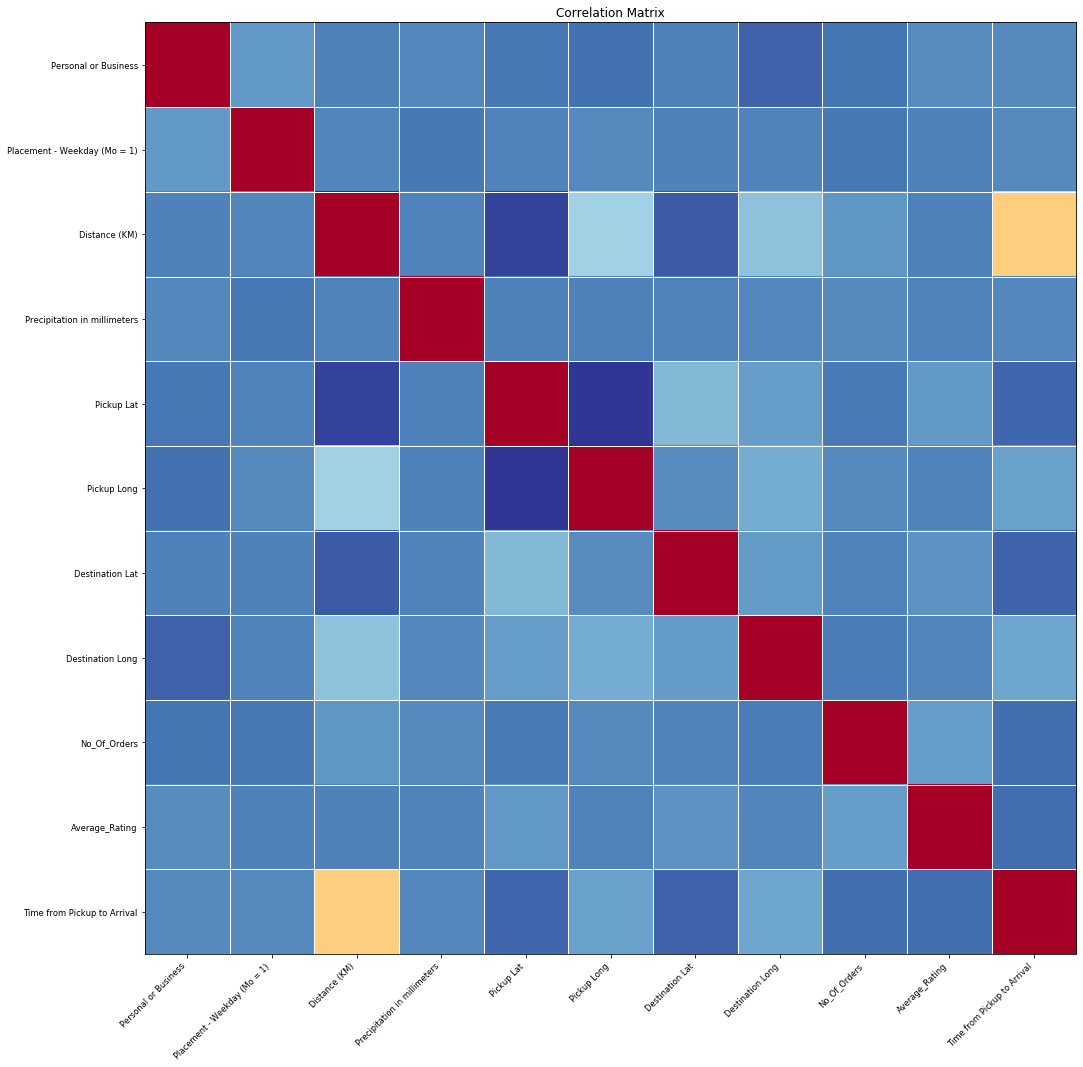

In [60]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(dataset.corr(), xnames = dataset.corr().columns, ax = ax);

In [66]:
dataset.drop(['Arrival at Pickup - Time'], axis=1, inplace=True)

In [67]:
dataset.head()

,Personal or Business,Placement - Weekday (Mo = 1),Distance (KM),Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Average_Rating,Time from Pickup to Arrival
0,0,5,4,0.0,-1.317755,36.830370,-1.300406,36.829741,1637,13.8,745
1,1,5,20,0.0,-1.326774,36.787807,-1.356237,36.904295,1637,13.8,2886
2,0,5,6,0.0,-1.255189,36.782203,-1.273412,36.818206,1637,13.8,2615
3,1,2,18,0.0,-1.290315,36.757377,-1.223520,36.802061,1637,13.8,2986
4,1,2,7,0.0,-1.273524,36.799220,-1.300431,36.752427,1637,13.8,1602
